In [71]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

In [39]:
combined_all = pd.read_csv('combined_all.csv')
input_df = pd.read_csv('input.csv')

In [40]:
len(input_df.columns), len(combined_all.columns)

(31, 91)

In [41]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 31 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      80 non-null     object 
 1   X_EA      80 non-null     float64
 2   X_Rvdw    80 non-null     float64
 3   X_Z       80 non-null     float64
 4   mean_A2B  80 non-null     float64
 5   X_G       80 non-null     float64
 6   X_IEII    75 non-null     float64
 7   mean_X2X  80 non-null     float64
 8   A_Rvdw    80 non-null     float64
 9   A_ChiA    77 non-null     float64
 10  A_IEI     80 non-null     float64
 11  B_Z       80 non-null     float64
 12  B_Hf      80 non-null     float64
 13  B_Ra      80 non-null     float64
 14  mean_A2X  80 non-null     float64
 15  std_B2X   80 non-null     float64
 16  OF        80 non-null     float64
 17  A_EA      80 non-null     float64
 18  std_A2X   80 non-null     float64
 19  B_Rho     78 non-null     float64
 20  E_coh     80 non-null     float64


In [42]:
combined_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 91 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           80 non-null     object 
 1   A_site         80 non-null     object 
 2   B_site         80 non-null     object 
 3   X_site         80 non-null     object 
 4   Spacegroup     80 non-null     object 
 5   Ehull          80 non-null     float64
 6   BulkModulus    80 non-null     float64
 7   Energy         80 non-null     float64
 8   ZPE            80 non-null     float64
 9   s_A            80 non-null     float64
 10  s_B            80 non-null     float64
 11  s_X            80 non-null     float64
 12  density        80 non-null     float64
 13  mean_A2B       80 non-null     float64
 14  mean_A2X       80 non-null     float64
 15  mean_B2X       80 non-null     float64
 16  mean_X2X       80 non-null     float64
 17  std_A2B        80 non-null     float64
 18  std_A2X     

In [106]:
object_cols = combined_all.select_dtypes(include=['object']).columns
float_cols = combined_all.select_dtypes(include=['float64']).columns

structural_descriptors = ["A_site", "B_site", "X_site", "Spacegroup"]

compound_descriptors = [
    "Ehull",
    "Energy",
    "E_coh",
    "mean_A2B",
    "mean_A2X",
    "mean_B2X",
    "mean_X2X",
    "std_A2B",
    "std_A2X",
    "std_B2X",
    "std_X2X",
    "BulkModulus",
    "density",
    "TF",
    "OF",
]

elemental_descriptors = ['Z', 'M', 'G', 'IEI', 'EA', 'ChiP', 'ChiA', 'Rvdw', 'Rc', 'Ra', 'MP', 'BP', 'Rho', 'Hf', 'Hv', 'Kappa', 'CvM', 'MendeleevNo']

target_property = ["Coeff_D"]

imp_columns = [
    "Ehull",
    "Energy",
    "E_coh",
    "TF",
    "OF",
    "Z",
    "BP",
    "ChiA",
    "Hf"]

# Analysis

### Structural Descriptors

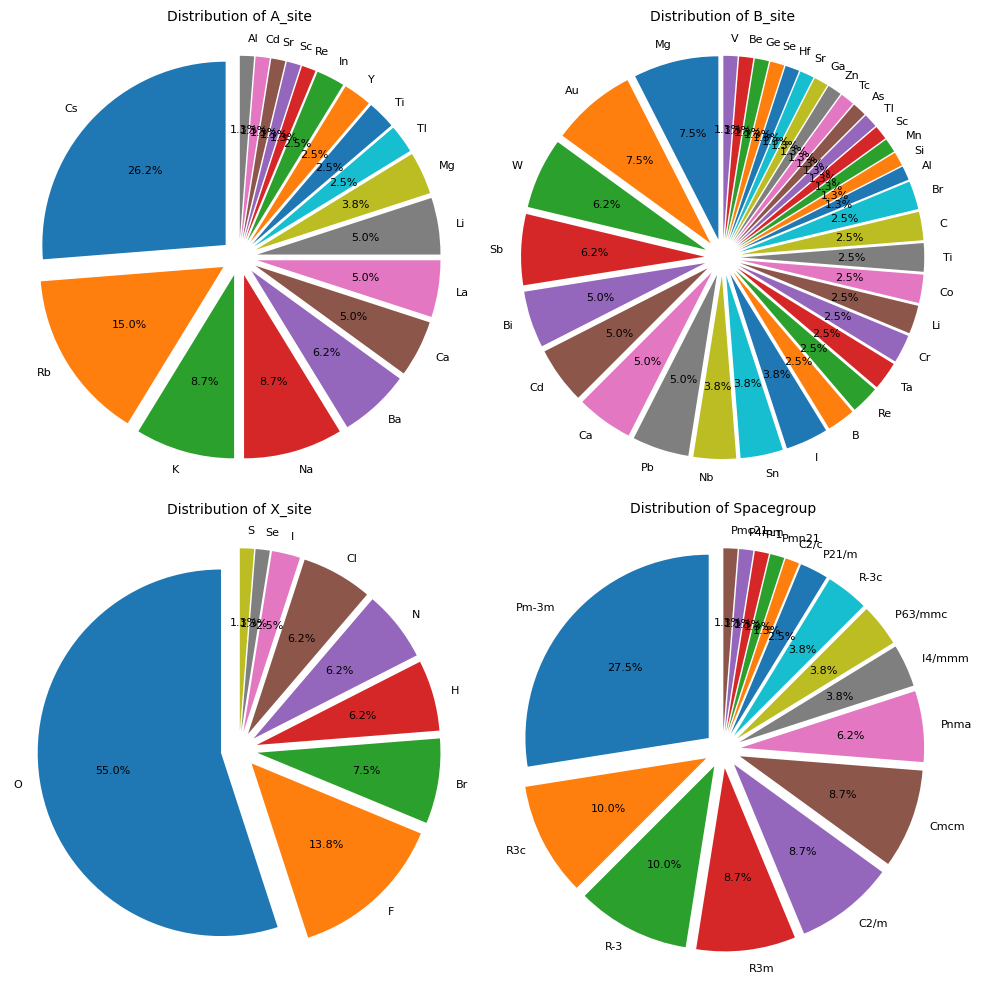

In [61]:
# Create a figure with a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Iterate over the structural descriptors and corresponding axes
for idx, column in enumerate(structural_descriptors):
    i, j = idx // 2, idx % 2
    # Calculate the value counts for the column
    value_counts = combined_all[column].value_counts()
    # Get the labels and sizes for the pie chart
    labels = value_counts.index
    sizes = value_counts.values
    # Plot the pie chart on the corresponding axis
    explode = [0.1] * len(labels)

    axs[i][j].pie(
        sizes,
        labels=labels,
        autopct="%1.1f%%",
        explode=explode,
        startangle=90,
        textprops={"fontsize": 8},
    )
    axs[i][j].set_title(f"Distribution of {column}", fontsize=10)

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

### Elemental Descriptors

In [17]:
len(elemental_descriptors)

18

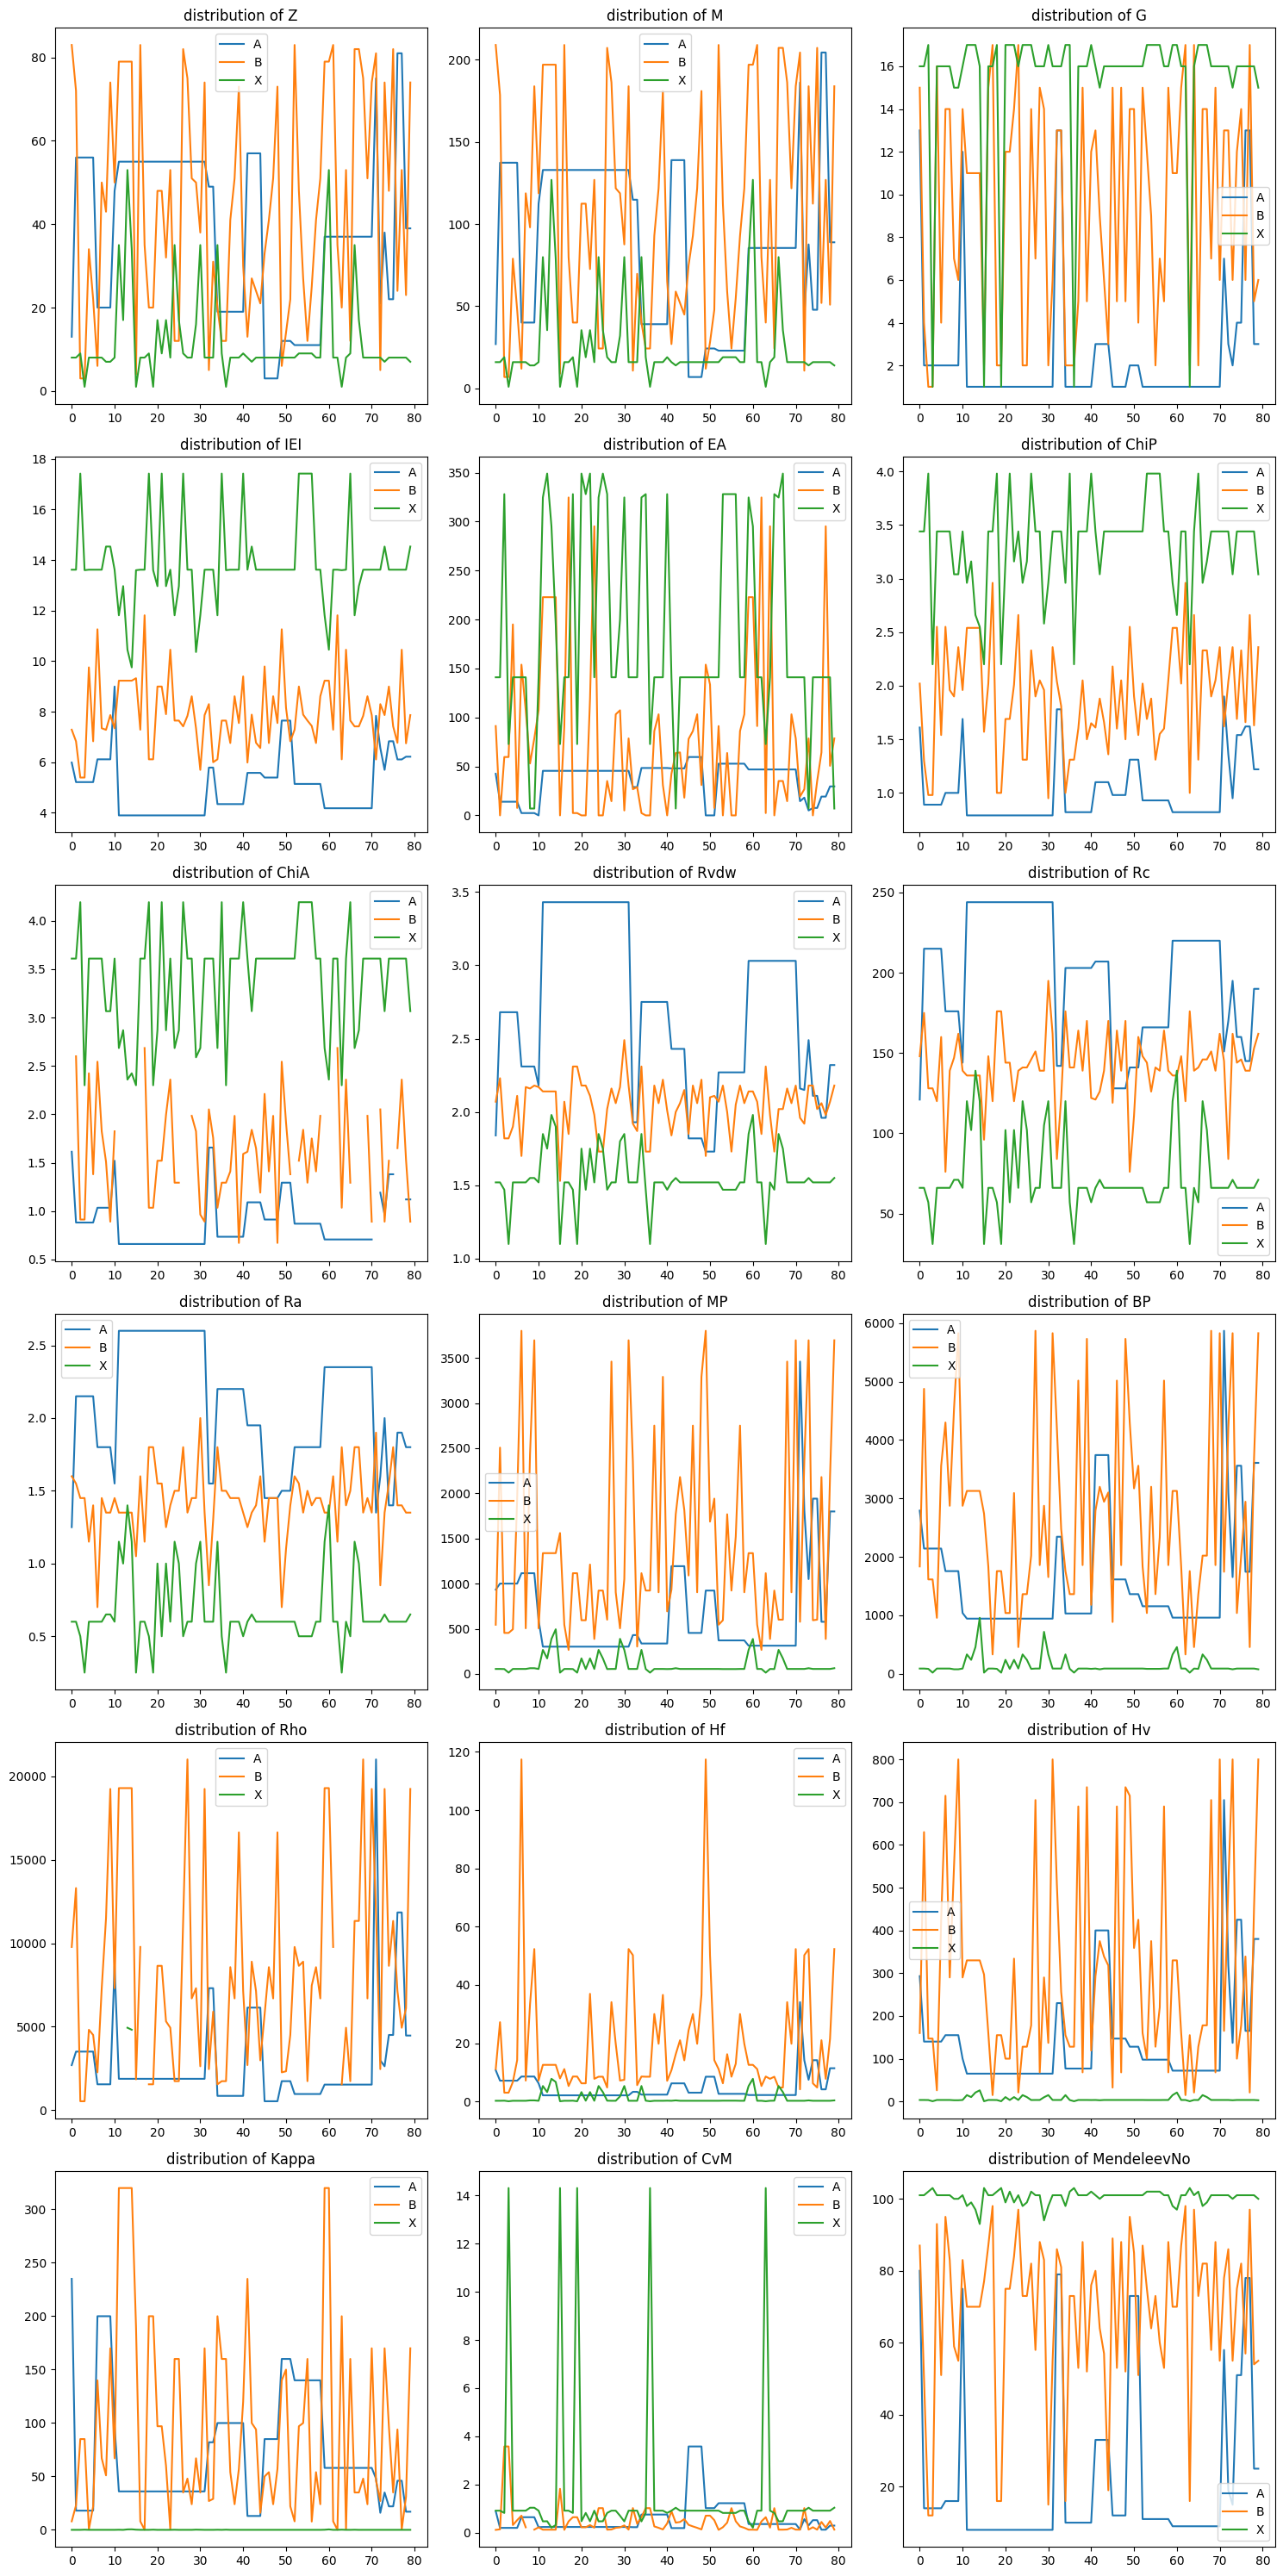

In [27]:
# Plot histogram for each float column
fig, axs = plt.subplots(6, 3, figsize=(15, 30))
for idx, column in enumerate(elemental_descriptors):
    i, j = idx//3, idx%3
    axs[i][j].plot(combined_all[f'A_{column}'], label='A')
    axs[i][j].plot(combined_all[f"B_{column}"], label='B')
    axs[i][j].plot(combined_all[f"X_{column}"], label='X')
    axs[i][j].legend()
    axs[i][j].set_title(f"distribution of {column}")

# fig.suptitle('Elemental discriptors')
fig.tight_layout()
plt.show()

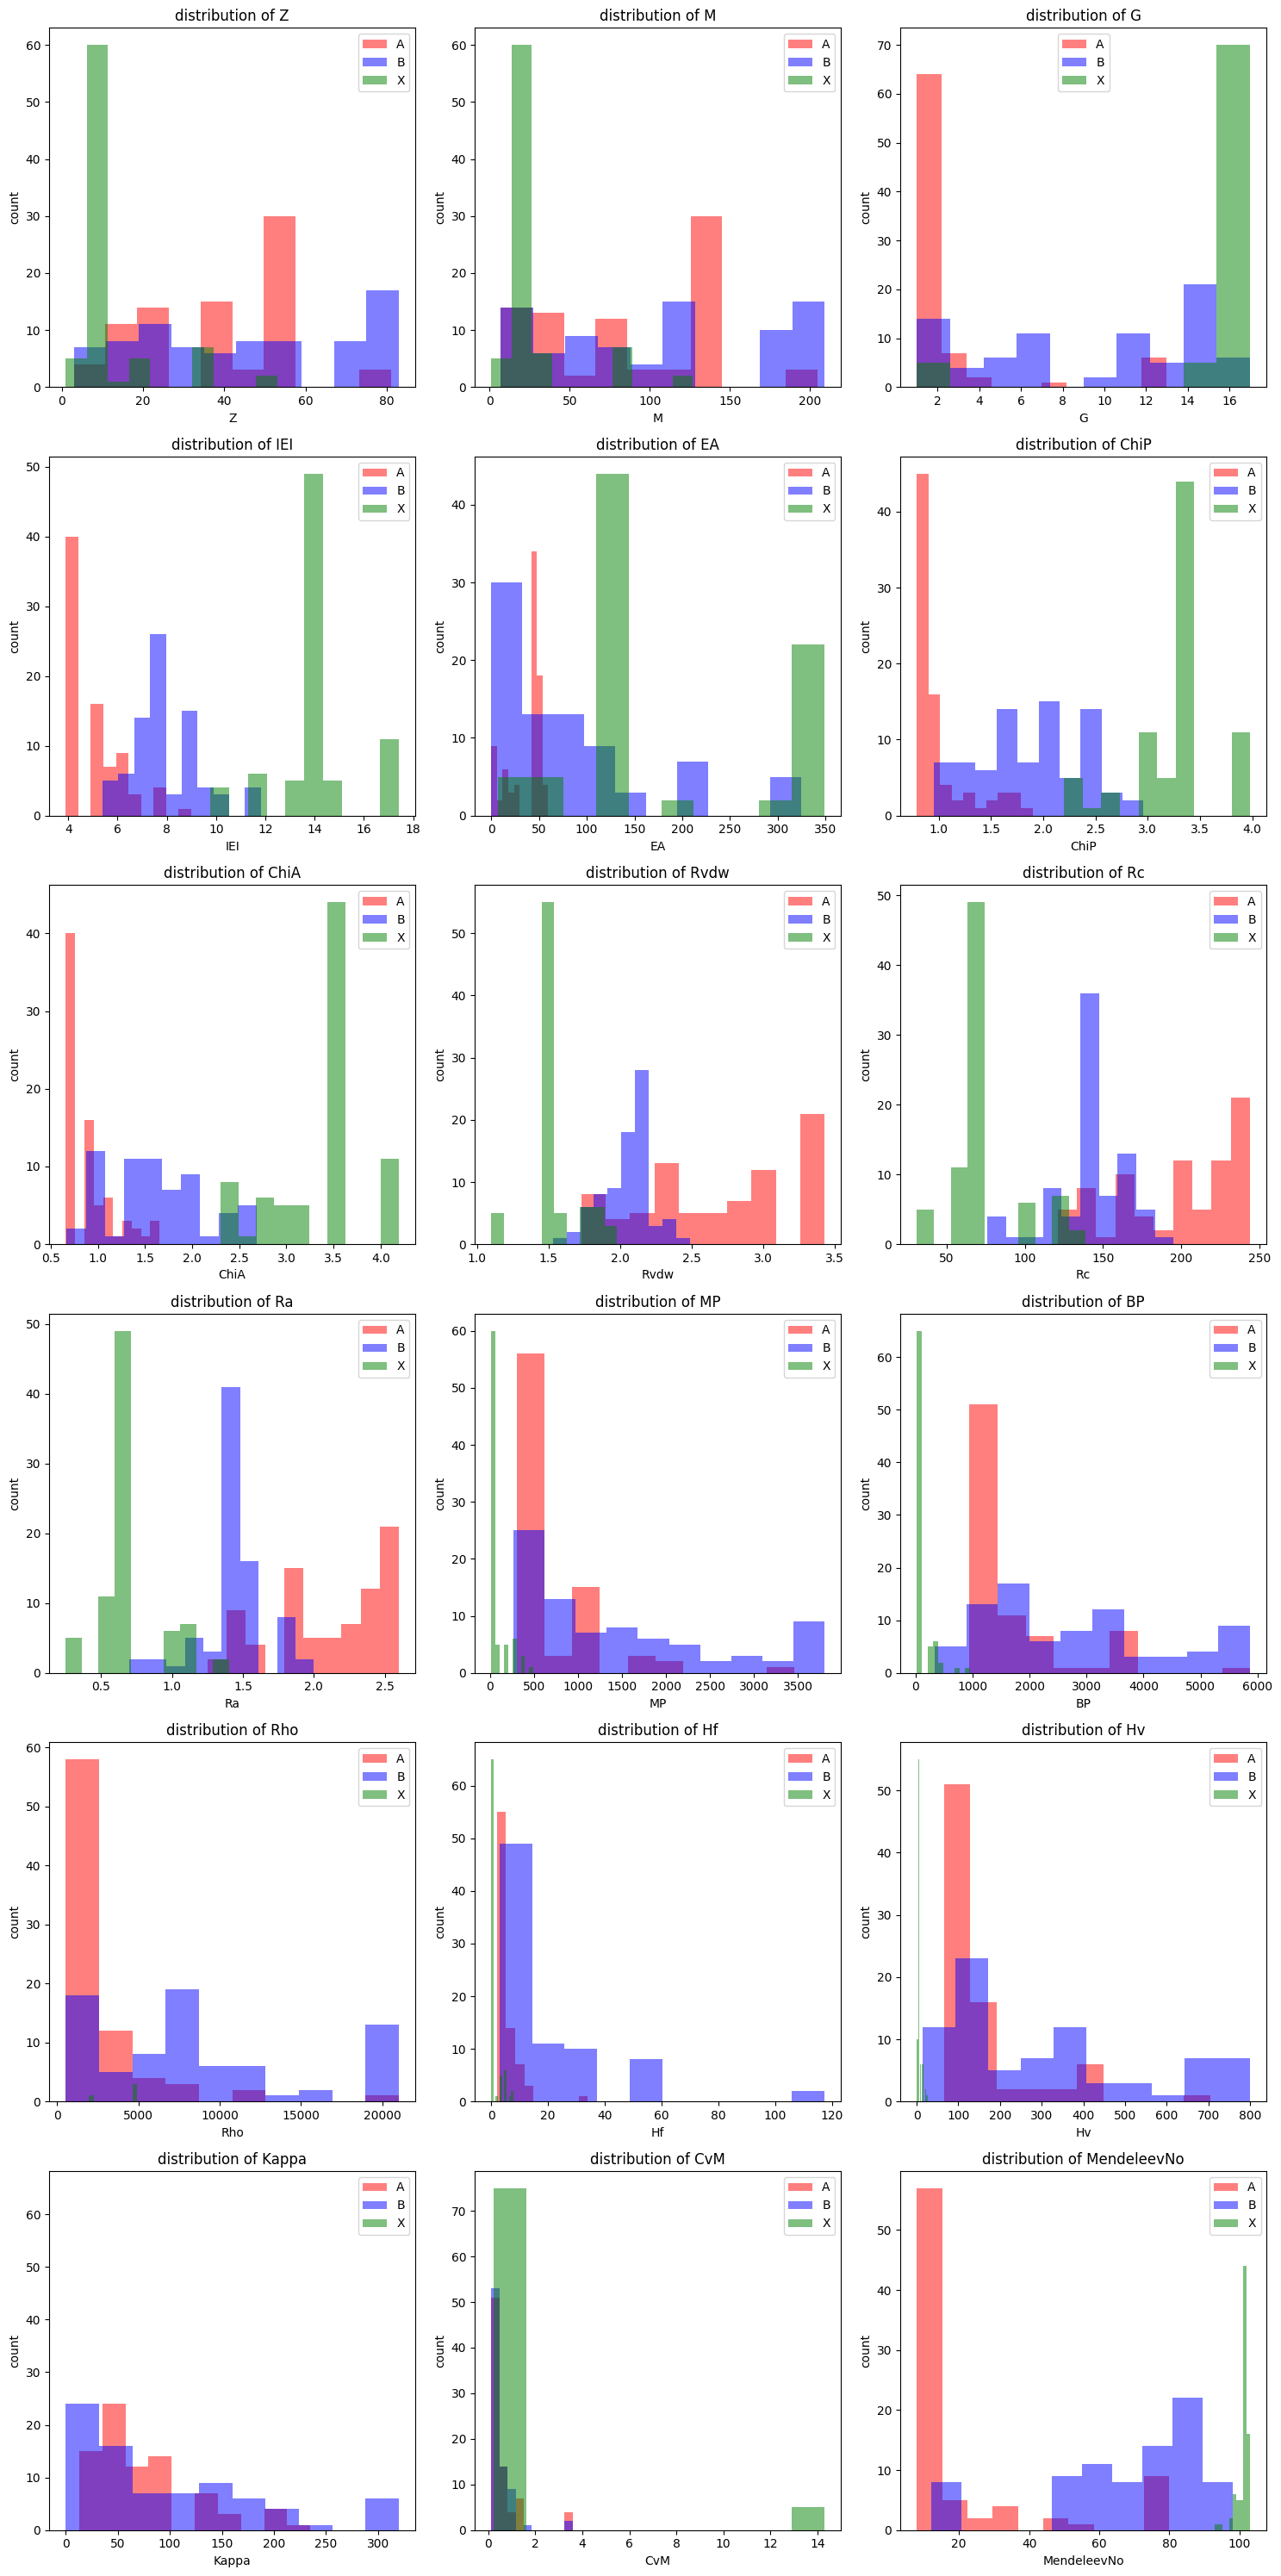

In [31]:
# Plot histogram for each float column
fig, axs = plt.subplots(6, 3, figsize=(15, 30))
for idx, column in enumerate(elemental_descriptors):
    i, j = idx // 3, idx % 3
    axs[i][j].hist(combined_all[f"A_{column}"], bins=10, label="A", color="red", alpha=0.5)
    axs[i][j].hist(combined_all[f"B_{column}"], bins=10, label="B", color="blue", alpha=0.5)
    axs[i][j].hist(combined_all[f"X_{column}"], bins=10, label="X", color="green", alpha=0.5)
    axs[i][j].legend()
    axs[i][j].set_title(f"distribution of {column}")
    axs[i][j].set_xlabel(column)
    axs[i][j].set_ylabel("count")

# fig.suptitle('Elemental discriptors')
fig.tight_layout()
plt.show()

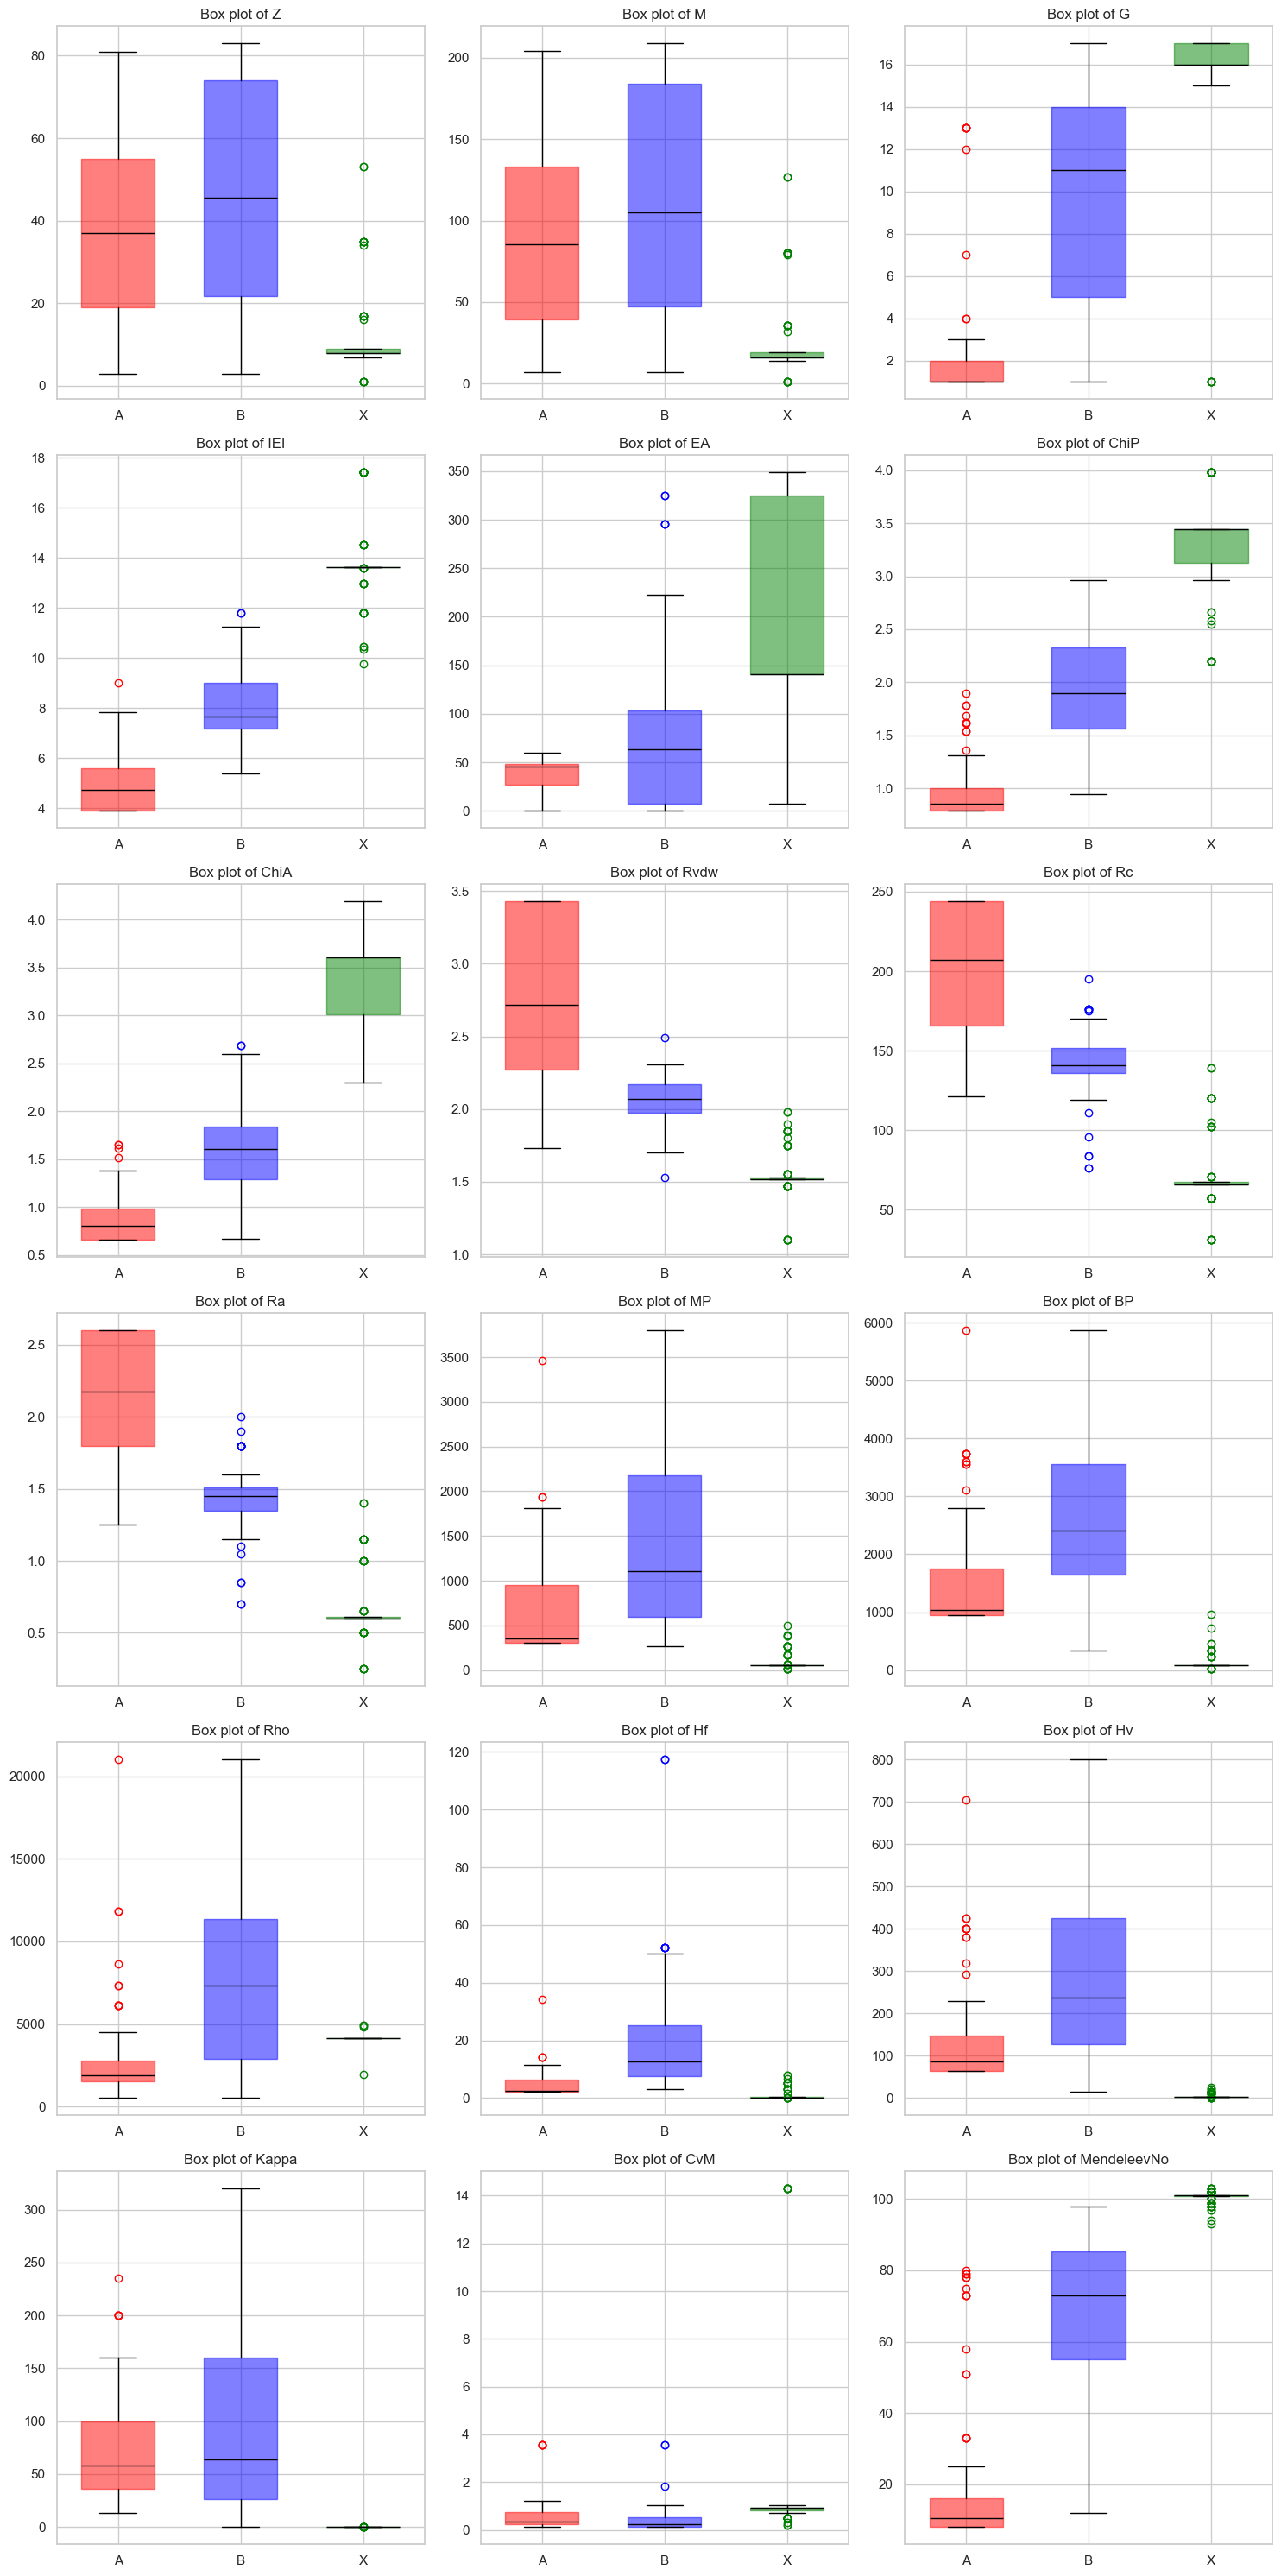

In [134]:
# Plot histogram for each float column
fig, axs = plt.subplots(6, 3, figsize=(15, 30))
for idx, column in enumerate(elemental_descriptors):
    i, j = idx // 3, idx % 3
    axs[i][j].boxplot(combined_all[f"A_{column}"], positions=[1], widths=0.6, patch_artist=True, boxprops=dict(facecolor='red', color='red', alpha=0.5), medianprops=dict(color='black'), whiskerprops=dict(color='black'), capprops=dict(color='black'), flierprops=dict(color='red', markeredgecolor='red'), labels=['A'])
    axs[i][j].boxplot(combined_all[f"B_{column}"], positions=[2], widths=0.6, patch_artist=True, boxprops=dict(facecolor='blue', color='blue', alpha=0.5), medianprops=dict(color='black'), whiskerprops=dict(color='black'), capprops=dict(color='black'), flierprops=dict(color='blue', markeredgecolor='blue'), labels=['B'])
    axs[i][j].boxplot(combined_all[f"X_{column}"], positions=[3], widths=0.6, patch_artist=True, boxprops=dict(facecolor='green', color='green', alpha=0.5), medianprops=dict(color='black'), whiskerprops=dict(color='black'), capprops=dict(color='black'), flierprops=dict(color='green', markeredgecolor='green'), labels=['X'])
    axs[i][j].set_title(f"Box plot of {column}")
    # axs[i][j].set_xlabel(column)
    # axs[i][j].set_ylabel("count")

# fig.suptitle('Elemental discriptors')
fig.tight_layout()
plt.show()

### Compound Descriptors

In [73]:
print(compound_descriptors)
print(len(compound_descriptors))

['Ehull', 'Energy', 'E_coh', 'mean_A2B', 'mean_A2X', 'mean_B2X', 'mean_X2X', 'std_A2B', 'std_A2X', 'std_B2X', 'std_X2X', 'BulkModulus', 'density', 'TF', 'OF']
15


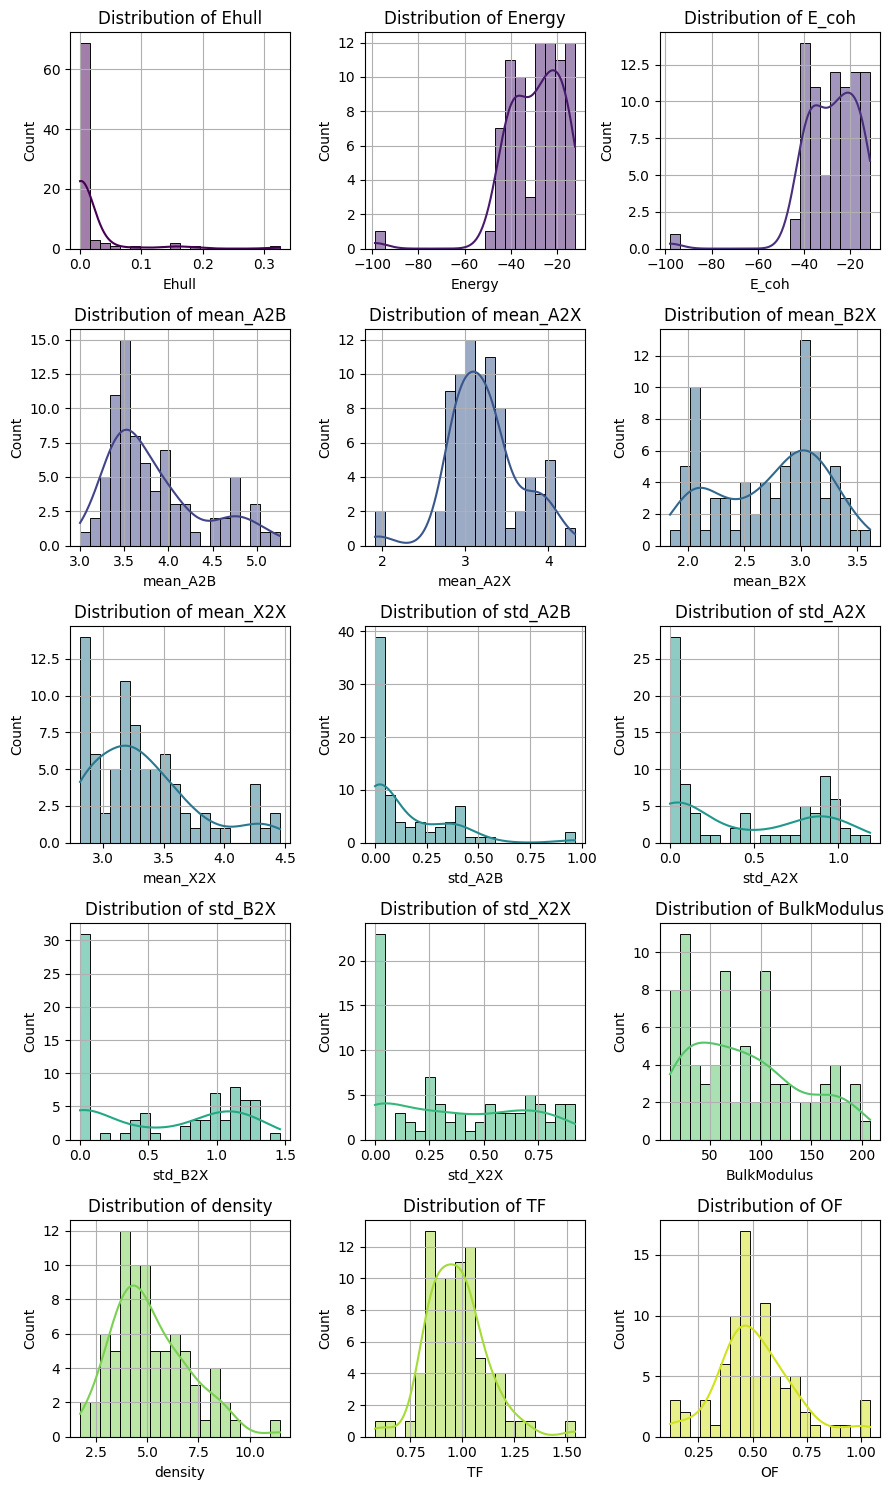

In [74]:
# Get a colormap
cmap = cm.viridis  # Choose any colormap that you like

fig, axs = plt.subplots(5, 3, figsize=(9, 15))
for idx, column in enumerate(compound_descriptors):
    i, j = idx // 3, idx % 3
    # Use seaborn's histplot for a histogram with a kernel density estimate
    color = cmap(
        float(idx) / len(compound_descriptors)
    )  # Get a color from the colormap
    sns.histplot(
        combined_all[f"{column}"], bins=20, ax=axs[i][j], color=color, kde=True
    )
    axs[i][j].set_title(f"Distribution of {column}")
    axs[i][j].grid(True)  # Add gridlines

fig.tight_layout()
plt.show()

### Target Property

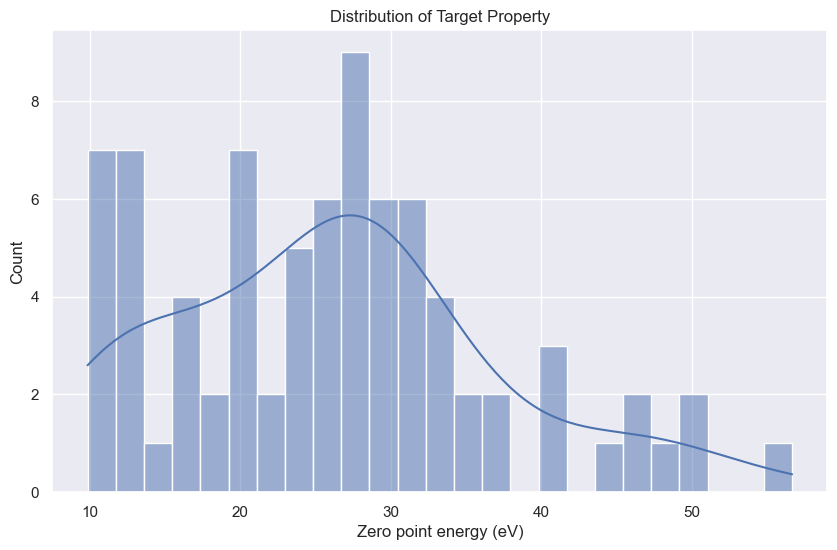

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set_theme(style='darkgrid')

# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(combined_all[target_property], kde=True, bins=25, color='blue', legend=False)

# Set the title and labels
plt.title("Distribution of Target Property")
plt.xlabel("Zero point energy (eV)")
plt.ylabel("Count")

# Show the plot
plt.show()

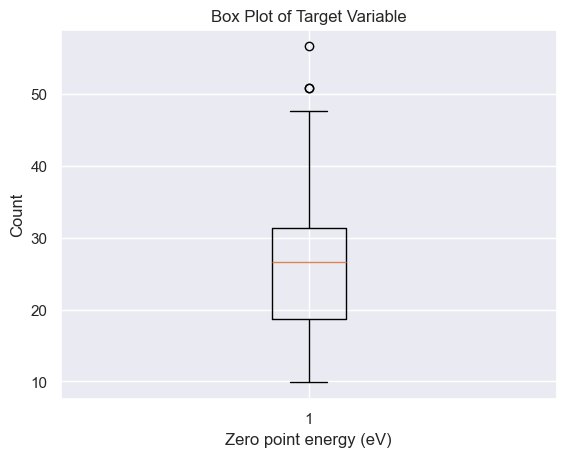

In [93]:
# Plot the box plot
sns.set_theme(style="darkgrid")

plt.boxplot(combined_all[target_property])

# Set labels for the figure
plt.xlabel("Zero point energy (eV)")
plt.ylabel("Count")
plt.title('Box Plot of Target Variable')

# Show the plot
plt.show()

### correlation with target variable

In [107]:
print(imp_columns)
print(len(imp_columns))

['Ehull', 'Energy', 'E_coh', 'TF', 'OF', 'Z', 'BP', 'ChiA', 'Hf']
9


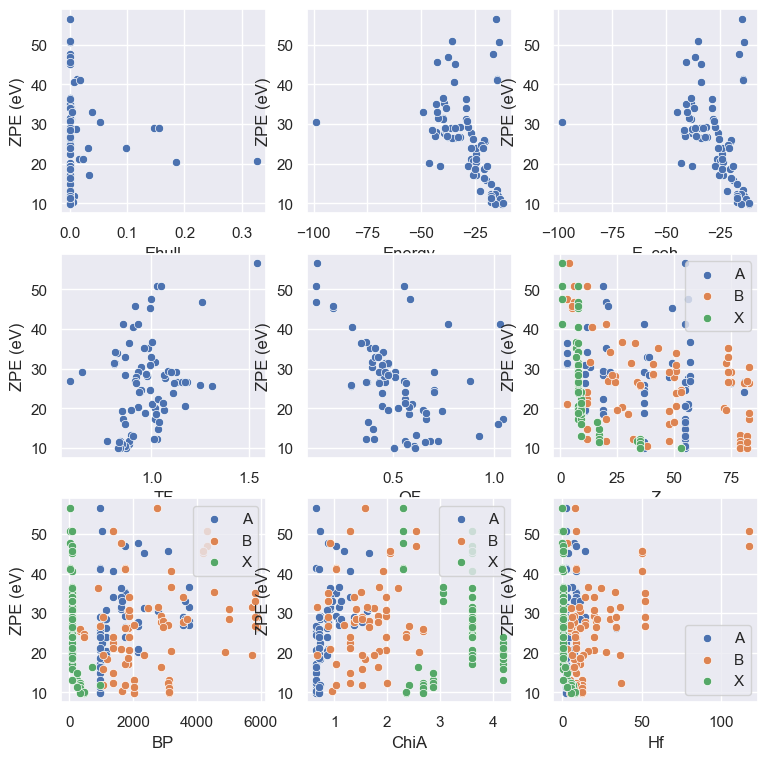

In [111]:
fig, axs = plt.subplots(3, 3, figsize=(9, 9))

# Flatten the axs array
axs = axs.flatten()

# Plot the correlation for each column
for i, column in enumerate(imp_columns):
    if column in elemental_descriptors:
        sns.scatterplot(
            x=f"A_{column}",
            y=target_property[0],
            data=combined_all,
            ax=axs[i],
            label="A",
        )
        sns.scatterplot(
            x=f"B_{column}",
            y=target_property[0],
            data=combined_all,
            ax=axs[i],
            label="B",
        )
        sns.scatterplot(
            x=f"X_{column}",
            y=target_property[0],
            data=combined_all,
            ax=axs[i],
            label="X",
        )
    else:
        sns.scatterplot(x=column, y=target_property[0], data=combined_all, ax=axs[i])
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('ZPE (eV)')

# Adjust the spacing between subplots
fig.tight_layout()
# fig.suptitle("relation between target and some imp features")

# Show the plot
plt.show()

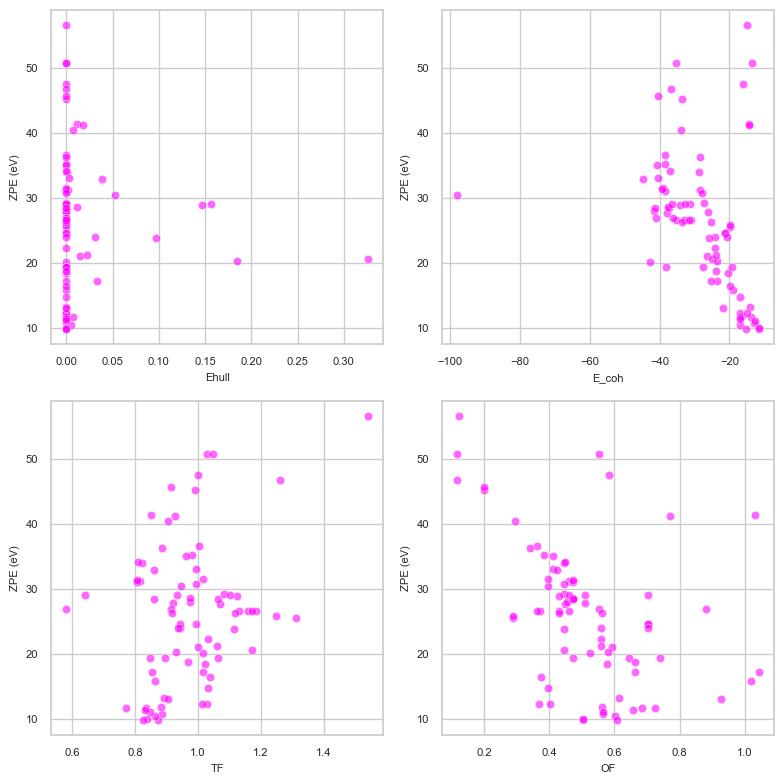

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Define the colormap
cmap = LinearSegmentedColormap.from_list("mycmap", ["orange", "blue", "green"])

# Set the style of the plot
sns.set_style("whitegrid")

fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Flatten the axs array
axs = axs.flatten()
first_4 = imp_columns[:5]
first_4.remove("Energy")
# Plot the correlation for each column
for i, column in enumerate(first_4):
    if column in elemental_descriptors:
        sns.scatterplot(
            x=f"A_{column}",
            y=target_property[0],
            data=combined_all,
            ax=axs[i],
            label="A",
            alpha=0.6,
            color=cmap(0.0),  # Yellow
        )
        sns.scatterplot(
            x=f"B_{column}",
            y=target_property[0],
            data=combined_all,
            ax=axs[i],
            label="B",
            alpha=0.6,
            color=cmap(0.5),  # Blue
        )
        sns.scatterplot(
            x=f"X_{column}",
            y=target_property[0],
            data=combined_all,
            ax=axs[i],
            label="X",
            alpha=0.6,
            color=cmap(1.0),  # Green
        )
        axs[i].legend(fontsize=8)  # Only call legend when there are labeled items
    else:
        sns.scatterplot(
            x=column,
            y=target_property[0],
            data=combined_all,
            ax=axs[i],
            alpha=0.6,
            color="magenta",
        )

    axs[i].set_xlabel(column, fontsize=8)
    axs[i].set_ylabel("ZPE (eV)", fontsize=8)
    axs[i].tick_params(axis="both", which="major", labelsize=8)

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

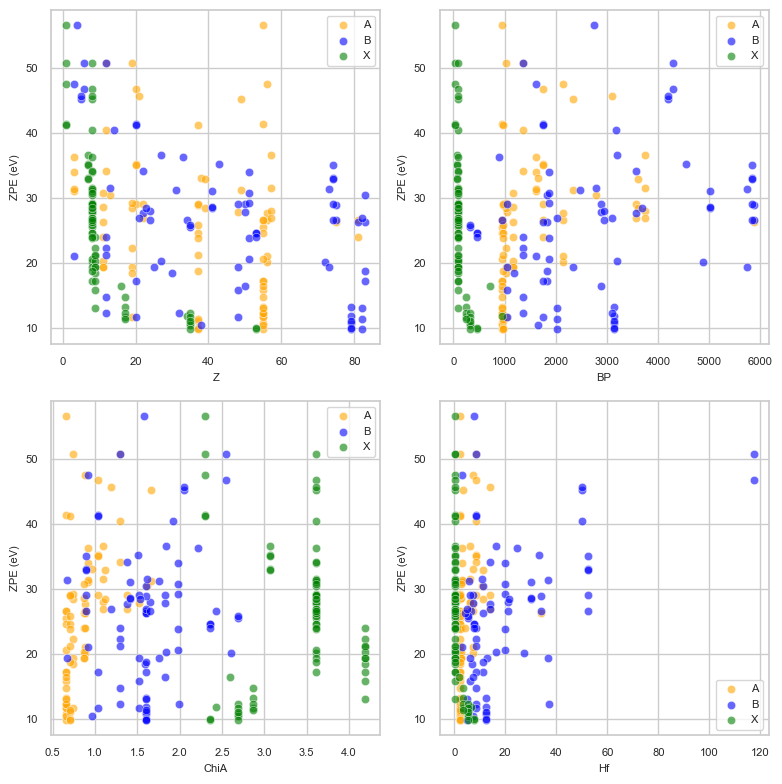

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Define the colormap
cmap = LinearSegmentedColormap.from_list("mycmap", ["orange", "blue", "green"])

# Set the style of the plot
sns.set_style("whitegrid")

fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Flatten the axs array
axs = axs.flatten()
last_4 = imp_columns[5:]
# Plot the correlation for each column
for i, column in enumerate(last_4):
    if column in elemental_descriptors:
        sns.scatterplot(
            x=f"A_{column}",
            y=target_property[0],
            data=combined_all,
            ax=axs[i],
            label="A",
            alpha=0.6,
            color=cmap(0.0),  # Yellow
        )
        sns.scatterplot(
            x=f"B_{column}",
            y=target_property[0],
            data=combined_all,
            ax=axs[i],
            label="B",
            alpha=0.6,
            color=cmap(0.5),  # Blue
        )
        sns.scatterplot(
            x=f"X_{column}",
            y=target_property[0],
            data=combined_all,
            ax=axs[i],
            label="X",
            alpha=0.6,
            color=cmap(1.0),  # Green
        )
        axs[i].legend(fontsize=8)  # Only call legend when there are labeled items
    else:
        sns.scatterplot(
            x=column,
            y=target_property[0],
            data=combined_all,
            ax=axs[i],
            alpha=0.6,
            color="skyblue",
        )

    axs[i].set_xlabel(column, fontsize=8)
    axs[i].set_ylabel("ZPE (eV)", fontsize=8)
    axs[i].tick_params(axis="both", which="major", labelsize=8)

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

### PCA

In [124]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Handle missing values by filling with the mean of the column
combined_all[float_cols] = combined_all[float_cols].fillna(
    combined_all[float_cols].mean()
)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_all[float_cols])

# Perform PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

ValueError: x and y must have same first dimension, but have shapes (86,) and (80,)

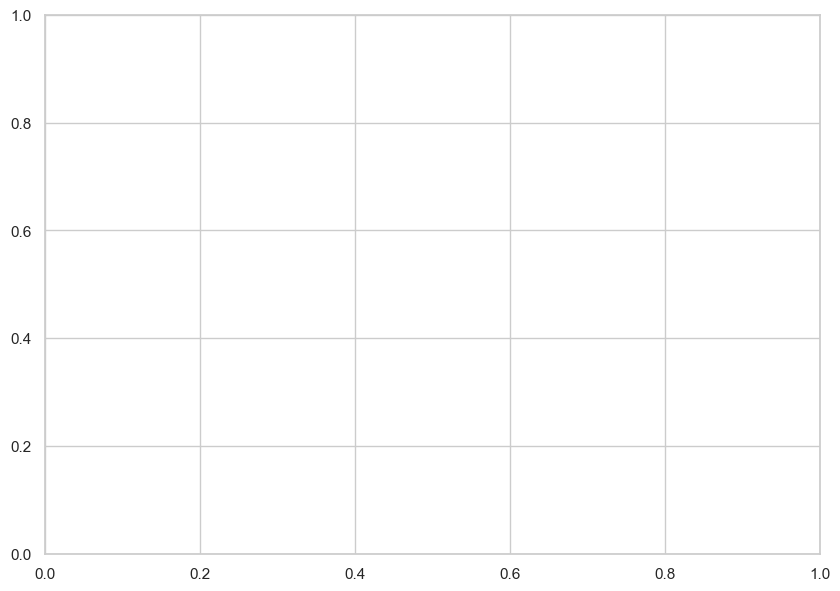

In [125]:
# Plot the explained variance ratio
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(float_cols) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Variance (%)")
plt.show()

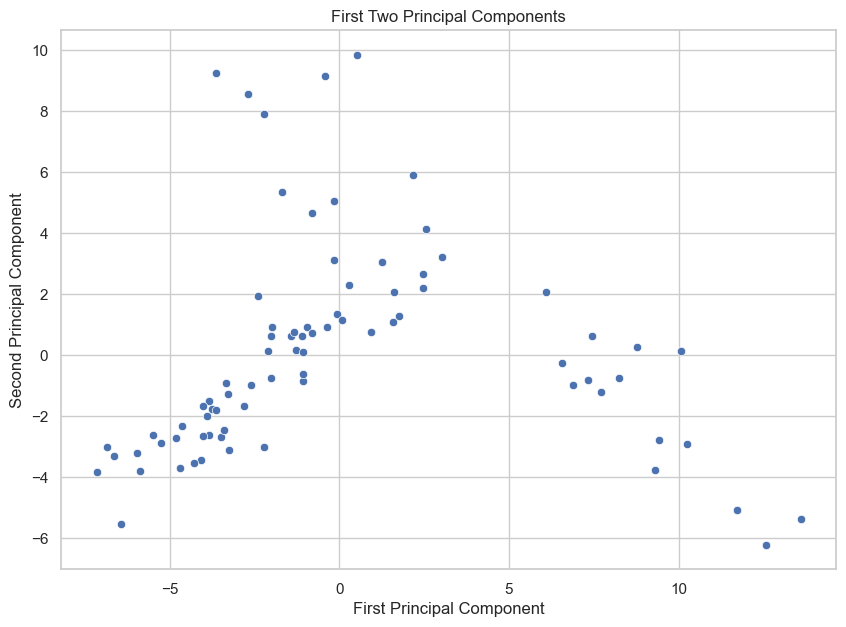

In [133]:
# Plot the first two principal components
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1])
plt.title("First Two Principal Components")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()

## --

In [8]:
df = combined_all[float_cols].copy()

In [21]:
summary_table = df.describe().T

# Set the float format to display 2 digits after the decimal point in scientific notation
pd.options.display.float_format = '{:.2e}'.format

# Display the summary table
# print(df.describe())


summary_table

,count,mean,std,min,25%,50%,75%,max
Ehull,8.00e+01,1.46e-02,4.86e-02,0.00e+00,0.00e+00,0.00e+00,2.50e-04,3.26e-01
BulkModulus,8.00e+01,8.59e+01,5.49e+01,1.10e+01,3.50e+01,7.34e+01,1.18e+02,2.07e+02
Energy,8.00e+01,-2.91e+01,1.28e+01,-9.88e+01,-3.82e+01,-2.69e+01,-1.97e+01,-1.22e+01
ZPE,8.00e+01,2.52e+01,1.18e+01,5.25e+00,1.74e+01,2.62e+01,3.15e+01,5.42e+01
s_A,8.00e+01,1.52e+00,3.47e-01,7.40e-01,1.35e+00,1.64e+00,1.88e+00,1.88e+00
...,...,...,...,...,...,...,...,...
X_MendeleevNo,8.00e+01,1.01e+02,1.74e+00,9.30e+01,1.01e+02,1.01e+02,1.01e+02,1.03e+02
Coeff_A,8.00e+01,8.07e-08,2.79e-08,3.40e-08,5.97e-08,7.11e-08,9.84e-08,1.37e-07
Coeff_B,8.00e+01,-2.49e-04,5.64e-05,-3.59e-04,-2.87e-04,-2.33e-04,-2.09e-04,-1.51e-04
Coeff_C,8.00e+01,-1.41e-02,3.80e-02,-1.32e-01,-3.21e-02,4.74e-03,1.19e-02,2.32e-02


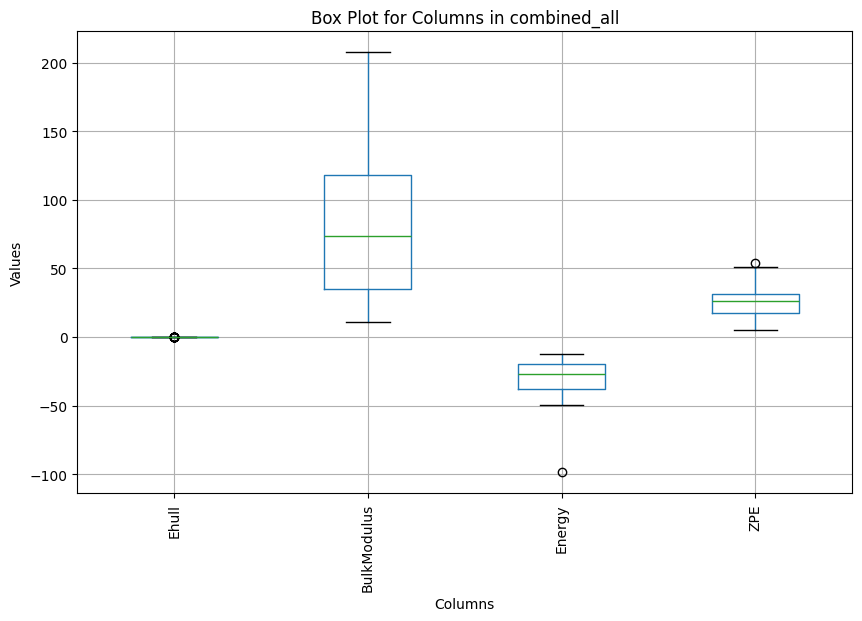

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot box plots for each column in combined_all
combined_all[imp_columns].boxplot()

# Set the title and labels
plt.title('Box Plot for Columns in combined_all')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [19]:
len(float_cols), len(imp_columns)

(86, 20)

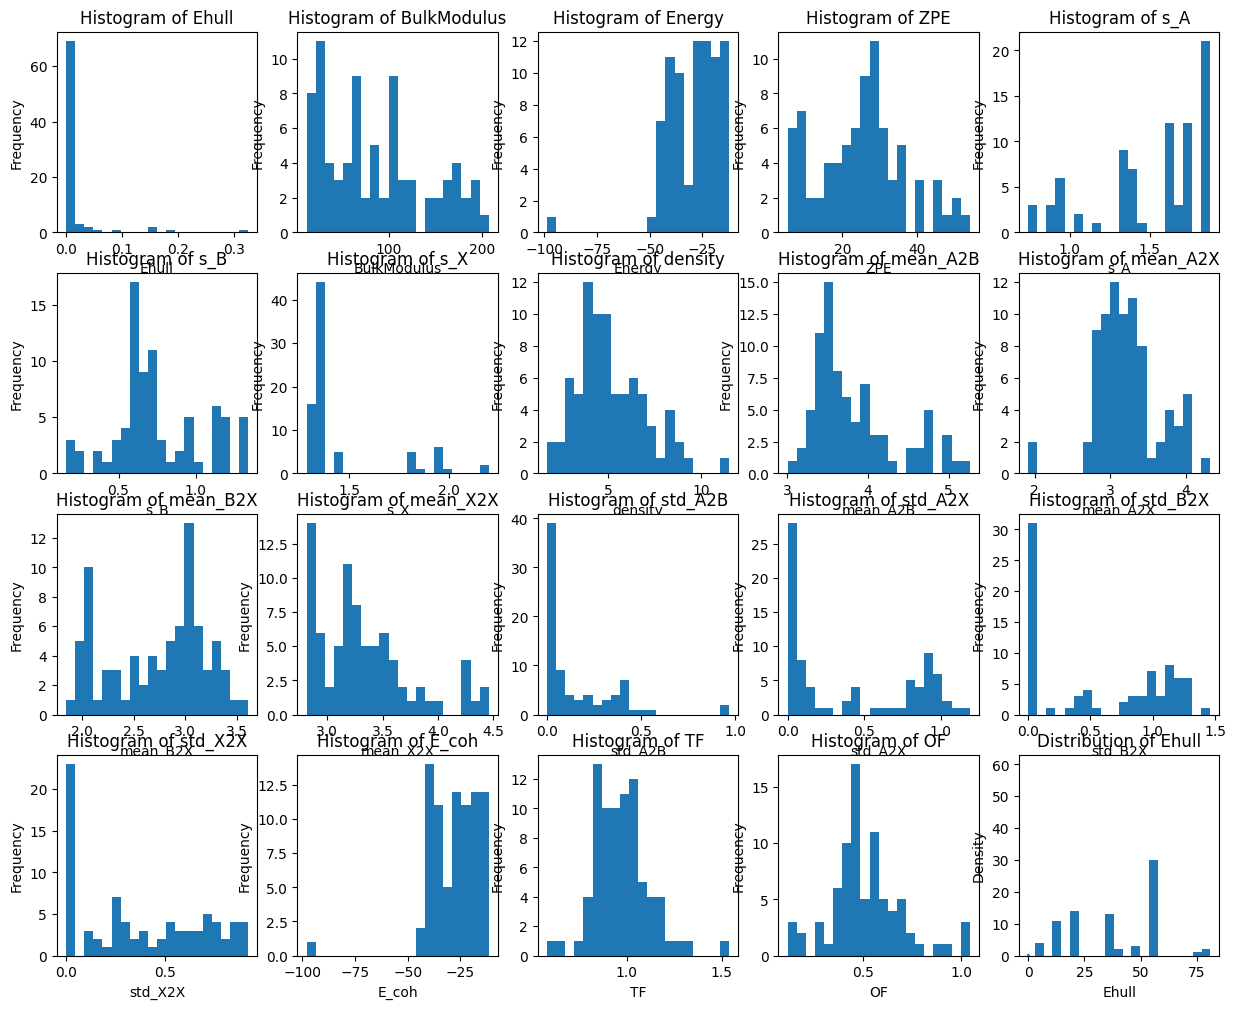

IndexError: index 5 is out of bounds for axis 0 with size 5

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for each float column
# for column in float_cols:
#     plt.hist(df[column], bins=10)  # Adjust the number of bins as needed
#     plt.title(f"Histogram of {column}")
#     plt.xlabel(column)
#     plt.ylabel("Frequency")
#     plt.show()

# Alternatively, you can use distplot for a smoothed distribution plot
for column in imp_columns:
    sns.histplot(df[column], kde=True)  # Use seaborn's distplot for a smoothed distribution plot
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.show()
    # Create a grid of subplots
    fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 12))

    # Plot histogram for each float column in the grid
    for i, column in enumerate(float_cols):
        row = i // 5
        col = i % 5
        
        axes[row, col].hist(df[column], bins=20)  # Adjust the number of bins as needed
        axes[row, col].set_title(f"Histogram of {column}")
        axes[row, col].set_xlabel(column)
        axes[row, col].set_ylabel("Frequency")

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()
